In [136]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import text2term

import ast

from collections import Counter

In [137]:
dataset = pd.read_csv('datasets/staging_test_set.csv').rename(columns={'EDAM Topics': 'Old EDAM Topics'})

In [138]:
dataset.head()

,PMID,Description,Abstract,MeSH Terms,Old EDAM Topics
0,33333024,We performed genome-wide CRISPR KO screens in ...,The Coronaviridae are a family of viruses that...,"['A549 Cells', 'Animals', 'Biosynthetic Pathwa...","['cel', 'CellML', 'Cell type accession', 'Zool..."
1,29116155,CRISPR-cas9 mutagenesis plasmid Tn916 oriT pla...,Clostridium difficile is a significant concern...,"['CRISPR-Associated Protein 9', 'CRISPR-Cas Sy...","['protein', 'Rate of association', 'Image meta..."
2,33199862,We developed Transcriptional Regulator Induced...,Transposon-based strategies provide a powerful...,"['Antitubercular Agents/*pharmacology', 'Gene ...","['Gene expression', 'Regular expression', 'Gen..."
3,28506317,Gut microbiota play a key role in maintaining ...,Gut microbiota play a key role in maintaining ...,"['Adult', 'Aged', 'Aged, 80 and over', 'Bacter...","['MGED', 'MGED concept ID', 'Protein signal pe..."
4,24939885,"Within the last decade, C. difficile infection...",Clostridium difficile infection is one of the ...,"['Adult', 'Aged', 'Aged, 80 and over', 'Bacter...","['MGED', 'MGED concept ID', 'Protein signal pe..."


In [139]:
def convert_list(string):
    try:
        return ast.literal_eval(string)
    except:
        return None

dataset['MeSH Terms'] = dataset['MeSH Terms'].apply(convert_list)

In [141]:
# Drop empty MeSH
dataset = dataset[~dataset['MeSH Terms'].isna()]

In [142]:
def has_slash_or_comma(lst):
    return any('/' in string or ',' in string for string in lst)

def has_forward_slash_or_comma(df, column_name):
    return df[column_name].apply(has_slash_or_comma)

has_forward_slash_or_comma(dataset, 'MeSH Terms').sum()

1368

In [143]:
def split_strings(lst):
    new_list = []
    for string in lst:
        filtered_str = string.replace('*', '')
        if '/' in filtered_str:
            new_list.extend([str.strip() for str in filtered_str.split('/')])
        elif ',' in filtered_str:
            new_list.extend([str.strip() for str in filtered_str.split(',')])
        else:
            new_list.append(filtered_str)
    return np.unique(new_list).tolist()

dataset['Filtered MeSH Terms'] = dataset['MeSH Terms'].apply(split_strings)

In [144]:
dataset['Filtered MeSH Terms']

0       [A549 Cells, Animals, Biosynthetic Pathways, C...
1       [CRISPR-Associated Protein 9, CRISPR-Cas Syste...
2       [Antitubercular Agents, Gene Expression Regula...
3       [80 and over, Adult, Aged, Bacteria, Clostridi...
4       [80 and over, Adult, Aged, Bacteria, Biologica...
                              ...                        
1379    [Animals, Collagen Type VI, Female, Gene Expre...
1380    [Animals, Cell Proliferation, Colitis, Colon, ...
1381    [Contig Mapping, Fungal, Genetic, Genome, Geno...
1382    [Cell Movement, Down-Regulation, Gene Expressi...
1383    [Animals, Computational Biology, Forecasting, ...
Name: Filtered MeSH Terms, Length: 1382, dtype: object

In [145]:
def flatten_lists(df, column_name):
    return [item for sublist in df[column_name] for item in sublist]

all_mesh_terms = flatten_lists(dataset, 'Filtered MeSH Terms')

In [146]:
mesh_term_freqs = Counter(all_mesh_terms)
unique_mesh_terms = set(all_mesh_terms)

In [147]:
min_frequency = min(mesh_term_freqs.values())
strings_with_min_frequency = [string for string, frequency in mesh_term_freqs.items() if frequency == min_frequency]

print('Minimum frequency:', min_frequency)
print('Terms with min frequency:', len(strings_with_min_frequency), '/', len(unique_mesh_terms))

Minimum frequency: 1
Terms with min frequency: 2235 / 4157


In [12]:
## text2term scores

edam_ontology = text2term.cache_ontology("https://data.bioontology.org/ontologies/EDAM/submissions/44/download?apikey=8b5b7825-538d-40e0-9e9e-5ab9274a9aeb", "EDAM")

2023-12-12 16:57:02 INFO [text2term.term_collector]: Loading ontology https://data.bioontology.org/ontologies/EDAM/submissions/44/download?apikey=8b5b7825-538d-40e0-9e9e-5ab9274a9aeb...
2023-12-12 16:57:12 INFO [text2term.term_collector]: ...done (ontology loading time: 10.36s)
2023-12-12 16:57:12 INFO [text2term.term_collector]: Collecting ontology term details...
2023-12-12 16:57:12 INFO [text2term.term_collector]: ...done: collected 3577 ontology terms (collection time: 0.16s)
2023-12-12 16:57:12 INFO [text2term.t2t]: Filtered ontology terms to those of type: any
2023-12-12 16:57:12 INFO [text2term.t2t]: Caching ontology https://data.bioontology.org/ontologies/EDAM/submissions/44/download?apikey=8b5b7825-538d-40e0-9e9e-5ab9274a9aeb to: cache/EDAM


In [148]:
mapped_terms = text2term.map_terms(list(unique_mesh_terms), "EDAM", use_cache=True)

2023-12-14 13:56:38 INFO [text2term.t2t]: Loading cached ontology from: cache/EDAM/EDAM-term-details.pickle
2023-12-14 13:56:38 INFO [text2term.t2t]: Filtered ontology terms to those of type: class
2023-12-14 13:56:38 INFO [text2term.t2t]: Mapping 4157 source terms to EDAM
2023-12-14 13:56:38 INFO [text2term.t2t]: ...done (mapping time: 0.20s seconds)


In [149]:
mapped_terms = mapped_terms[mapped_terms['Mapped Term IRI'].str.contains('topic')]
mapped_terms

,Source Term ID,Source Term,Mapped Term Label,Mapped Term CURIE,Mapped Term IRI,Mapping Score,Tags
1,http://ccb.hms.harvard.edu/t2t/R72o3NRrdrr,West Nile virus,Exome sequencing,EDAM.TOPIC:3676,http://edamontology.org/topic_3676,0.470,None
5,http://ccb.hms.harvard.edu/t2t/RF5JuvkTDHs,Drug Screening Assays,Compound libraries and screening,EDAM.TOPIC:3343,http://edamontology.org/topic_3343,0.370,None
6,http://ccb.hms.harvard.edu/t2t/R8wepaBTSq8,Eukaryotic Initiation Factors,Eukaryotes,EDAM.TOPIC:2818,http://edamontology.org/topic_2818,0.603,None
7,http://ccb.hms.harvard.edu/t2t/R8wepaBTSq8,Eukaryotic Initiation Factors,Unicellular eukaryotes,EDAM.TOPIC:2821,http://edamontology.org/topic_2821,0.449,None
9,http://ccb.hms.harvard.edu/t2t/RFikSytyzdA,Phosphatidylethanolamines,Phosphorylation sites,EDAM.TOPIC:0751,http://edamontology.org/topic_0751,0.319,None
...,...,...,...,...,...,...,...
7413,http://ccb.hms.harvard.edu/t2t/RADityvV3y8,"Spores, Fungal",Fungi,EDAM.TOPIC:0782,http://edamontology.org/topic_0782,0.425,None
7419,http://ccb.hms.harvard.edu/t2t/RJk64UmzhBv,Air Pollution,Evolutionary biology,EDAM.TOPIC:3299,http://edamontology.org/topic_3299,0.319,None
7420,http://ccb.hms.harvard.edu/t2t/RDQZjhouA2V,Microsatellite Instability,Microsatellites,EDAM.TOPIC:2868,http://edamontology.org/topic_2868,0.700,None
7424,http://ccb.hms.harvard.edu/t2t/RGUKE93HGCj,F-Box-WD Repeat-Containing Protein 7,Protein sequence repeats,EDAM.TOPIC:3543,http://edamontology.org/topic_3543,0.381,None


In [169]:
mapped_terms[mapped_terms['Mapped Term Label'] == 'Animal study']

,Source Term ID,Source Term,Mapped Term Label,Mapped Term CURIE,Mapped Term IRI,Mapping Score,Tags
162,http://ccb.hms.harvard.edu/t2t/RBV3yazXSg3,Longitudinal Studies,Animal study,EDAM.TOPIC:3679,http://edamontology.org/topic_3679,0.300,None
507,http://ccb.hms.harvard.edu/t2t/RAfVqRcU4yk,"Wings, Animal",Animal study,EDAM.TOPIC:3679,http://edamontology.org/topic_3679,0.418,None
1404,http://ccb.hms.harvard.edu/t2t/RGqvj2pvdRz,Genome-Wide Association Study,Animal study,EDAM.TOPIC:3679,http://edamontology.org/topic_3679,0.450,None
1420,http://ccb.hms.harvard.edu/t2t/RGCqLAQm9cZ,Proof of Concept Study,Animal study,EDAM.TOPIC:3679,http://edamontology.org/topic_3679,0.401,None
1605,http://ccb.hms.harvard.edu/t2t/RK5jdVE24jg,"Behavior, Animal",Animal study,EDAM.TOPIC:3679,http://edamontology.org/topic_3679,0.369,None
2019,http://ccb.hms.harvard.edu/t2t/RGg9MozfTDu,Animal Feed,Animal study,EDAM.TOPIC:3679,http://edamontology.org/topic_3679,0.461,None
3018,http://ccb.hms.harvard.edu/t2t/RDoz8NeaxVz,Animal Scales,Animal study,EDAM.TOPIC:3679,http://edamontology.org/topic_3679,0.433,None
3356,http://ccb.hms.harvard.edu/t2t/R49AcJZ3XBX,"Salmonella Infections, Animal",Animal study,EDAM.TOPIC:3679,http://edamontology.org/topic_3679,0.318,None
4853,http://ccb.hms.harvard.edu/t2t/RDPUzKC8DnW,Students,Animal study,EDAM.TOPIC:3679,http://edamontology.org/topic_3679,0.342,None
5212,http://ccb.hms.harvard.edu/t2t/RDgkVuAP6UF,Animals,Animal study,EDAM.TOPIC:3679,http://edamontology.org/topic_3679,0.516,None


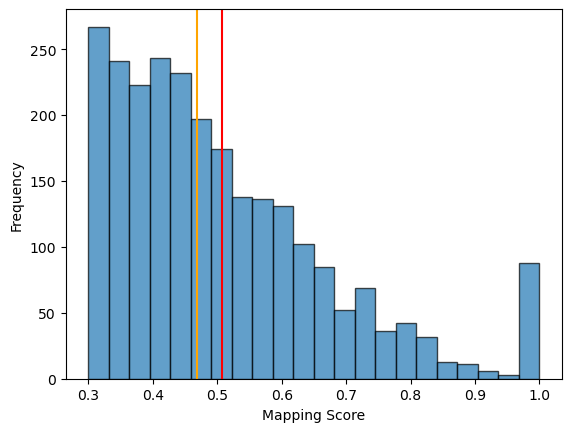

In [150]:
plt.hist(mapped_terms['Mapping Score'].values, bins='auto', edgecolor='black', alpha=0.7)

plt.xlabel('Mapping Score')
plt.ylabel('Frequency')

plt.axvline(np.mean(mapped_terms['Mapping Score'].values), color='red')
plt.axvline(np.median(mapped_terms['Mapping Score'].values), color='orange')

In [151]:
# threshold = np.mean(mapped_terms['Mapping Score'].values)
threshold = 0.7

def map_mesh_to_edam(mesh_terms):
    # mapping = text2term.map_terms(mesh_terms, "EDAM", use_cache=True)
    try:
         filtered_mapping = text2term.map_terms(mesh_terms, "EDAM", use_cache=True)
        # filtered_mapping = text2term.map_terms([term for term in mesh_terms if mesh_term_freqs[term] > 1], "EDAM", use_cache=True)
    except:
        return None

    # Only consider mappings over threshold
    filtered_terms = filtered_mapping[filtered_mapping['Mapping Score'] > threshold]

    return filtered_terms['Mapped Term Label'].unique().tolist()

dataset['New EDAM Topics'] = dataset['Filtered MeSH Terms'].apply(map_mesh_to_edam)

2023-12-14 13:56:42 INFO [text2term.t2t]: Loading cached ontology from: cache/EDAM/EDAM-term-details.pickle
2023-12-14 13:56:42 INFO [text2term.t2t]: Filtered ontology terms to those of type: class
2023-12-14 13:56:42 INFO [text2term.t2t]: Mapping 29 source terms to EDAM
2023-12-14 13:56:42 INFO [text2term.t2t]: ...done (mapping time: 0.08s seconds)
2023-12-14 13:56:42 INFO [text2term.t2t]: Loading cached ontology from: cache/EDAM/EDAM-term-details.pickle
2023-12-14 13:56:42 INFO [text2term.t2t]: Filtered ontology terms to those of type: class
2023-12-14 13:56:42 INFO [text2term.t2t]: Mapping 13 source terms to EDAM
2023-12-14 13:56:43 INFO [text2term.t2t]: ...done (mapping time: 0.07s seconds)
2023-12-14 13:56:43 INFO [text2term.t2t]: Loading cached ontology from: cache/EDAM/EDAM-term-details.pickle
2023-12-14 13:56:43 INFO [text2term.t2t]: Filtered ontology terms to those of type: class
2023-12-14 13:56:43 INFO [text2term.t2t]: Mapping 11 source terms to EDAM
2023-12-14 13:56:43 INFO

In [152]:
# Drop rows with no mapped terms
dataset = dataset[~dataset['New EDAM Topics'].isna()]

In [153]:
# Remove any EDAM not in the list
with open(input("Enter EDAM topics file:"), 'r') as edam_file:
    full_edam_topics = edam_file.readlines()

full_edam_topics = [topic.strip() for topic in full_edam_topics]

dataset['New EDAM Topics'] = dataset['New EDAM Topics'].apply(lambda x: [item for item in x if item in full_edam_topics])

In [170]:
# Compare old and new (dataset vs outputs.csv)

gpt_output = pd.read_csv('outputs.csv')

In [171]:
def get_new_edam(abstract):
    # topics = dataset.loc[dataset['Abstract'] == abstract, 'New EDAM Topics'].values
    # return topics[0] if len(topics[0]) > 0 else None

    matching_rows = dataset.loc[dataset['Abstract'] == abstract, 'New EDAM Topics']
    
    if not matching_rows.empty:
        return matching_rows.iloc[0]
    else:
        return None

print(get_new_edam(gpt_output.iloc[0]['Abstract']))
print(gpt_output['Ground Truth'].iloc[0])

['Zoology', 'Computational biology', 'Genetics']
Animal study, Biology, Computational biology, Immunoinformatics, Laboratory animal science, Proteins, Sequence analysis, Zoology


In [172]:
gpt_output.rename(columns={'Ground Truth': 'Old Ground Truth'}, inplace=True)

In [173]:
gpt_output['New Ground Truth'] = gpt_output['Abstract'].apply(get_new_edam)

In [174]:
# Drop any rows without mappings
gpt_output = gpt_output[~gpt_output['New Ground Truth'].isna()]

In [175]:
# Get MeSH Terms

def get_mesh_terms(abstract):
    matching_rows = dataset.loc[dataset['Abstract'] == abstract, 'MeSH Terms']
    
    if not matching_rows.empty:
        return matching_rows.iloc[0]
    else:
        return None

In [176]:
gpt_output['MeSH Terms'] = gpt_output['Abstract'].apply(get_mesh_terms)
# Drop any rows without mappings
gpt_output = gpt_output[~gpt_output['MeSH Terms'].isna()]

In [179]:
gpt_output = gpt_output[['Model', 'Abstract', 'MeSH Terms', 'Old Ground Truth', 'New Ground Truth', 'Predictions', 'Prioritized Predictions']]
gpt_output.to_csv(input("Enter file name: "), index=False)

In [180]:
# Compare old terms with new terms
from IPython.display import HTML

for idx, row in gpt_output.sample(n=5).iterrows():
    display('Abstract:', HTML(f"<p style='overflow-x: auto'>{row['Abstract']}</p>"))
    # print('Abstract:', row['Abstract'].replace('.', '.\n'))
    print('Old:', row['Old Ground Truth'])
    print('New:', ', '.join(row['New Ground Truth']))
    print('GPT:', row['Predictions'], '\n')

'Abstract:'

Old: Animal study, Cell biology, DNA binding sites, DNA mutation, Embryology, Gene expression, Gene regulation, Laboratory animal science, Neurology, Protein binding sites, Proteins, RNA, Zoology
New: Zoology, Biology, Developmental biology, Drug development, Gene expression, Gene regulation, DNA mutation, RNA, Genetics, Drug metabolism
GPT: Genetics, Developmental biology, Epigenetics, Neurobiology, Embryology, RNA-Seq, Gene expression, Gene regulation, Neural tube defects, Craniofacial development, WNT signaling pathway, Epigenetic determinant, Methylcytosine dioxygenase 



'Abstract:'

Old: Animal study, Clone library, DNA replication and recombination, Evolutionary biology, Genetics, Genomics, Laboratory animal science, Model organisms, Zoology
New: Zoology, Genetics, DNA replication and recombination
GPT: Animal study, DNA mutation, DNA packaging, DNA polymorphism, DNA replication and recombination, Gene regulation, Genomic imprinting, Laboratory animal science, Zoology 



'Abstract:'

Old: Animal study, DNA mutation, Gene expression, Human biology, Human genetics, Laboratory animal science, Preclinical and clinical studies, Sequence analysis, Zoology
New: Zoology, Gene expression, Genetics, Human biology, DNA mutation, Immunology, Immunogenetics, Immunoinformatics, Drug metabolism, Pharmacology, Physiology
GPT: Animal study, Antimicrobial Resistance, Human biology, Human genetics, Laboratory animal science, Ontology and terminology, Protein binding sites, Protein variants, Zoology 



'Abstract:'

Old: Animal study, Cell culture collection, Laboratory animal science, RNA, Zoology
New: Zoology, Genetics, Virology
GPT: Animal study, Laboratory animal science, RNA, Small molecules, Zoology 



'Abstract:'

Old: Gene expression, Gene regulation, Proteins, Systems biology, Systems medicine
New: Gene expression, Gene regulation, Proteins, Genetics, Drug metabolism, Parasitology
GPT: Gene expression, Gene regulation, Human biology, Human genetics, Protein binding sites 



In [234]:
# Get PMIDs

def get_pmids(abstract):
    matching_rows = dataset.loc[dataset['Abstract'] == abstract, 'PMID']
    
    if not matching_rows.empty:
        return matching_rows.iloc[0]
    else:
        return None

In [305]:
pmids = gpt_output['Abstract'].apply(get_pmids)
# Drop any rows without mappings
pmids = pmids[~pmids.isna()]

In [306]:
pmids.to_csv('pmids.csv', index=False)

## Testing for discrepancy in MeSH terms

There seems to be a disrepancy between the returned xml data and text data

In [275]:
from Bio import Entrez, Medline

Entrez.email = "zqazi@scripps.edu"

handle = Entrez.efetch(db="pubmed", id=21406103, retmode="xml")

In [276]:
article_data = Entrez.read(handle)
handle.close()


In [277]:
mesh_terms = []
if "PubmedArticle" in article_data:
    for article in article_data["PubmedArticle"]:
        if "MeshHeadingList" in article["MedlineCitation"]:
            mesh_headings = article["MedlineCitation"]["MeshHeadingList"]
            for heading in mesh_headings:
                descriptor_name = heading["DescriptorName"]
                mesh_terms.append(str(descriptor_name))

mesh_terms

['Arabidopsis',
 'Arabidopsis Proteins',
 'Gene Expression Profiling',
 'Gene Expression Regulation, Plant',
 'Gene Regulatory Networks',
 'Hemoglobins',
 'Nitric Oxide',
 'Oligonucleotide Array Sequence Analysis',
 'Oxidative Stress',
 'Oxygen',
 'Plants, Genetically Modified',
 'Promoter Regions, Genetic',
 'RNA, Plant',
 'Seeds',
 'Stress, Physiological']

In [328]:
handle = Entrez.efetch(db="pubmed", id=21406103, rettype='medline', retmode="text")
article_data = Medline.parse(handle)

In [329]:
for record in article_data:
    mesh = record.get('MH', '?')
    abstract = record.get('AB', '?')

print(mesh)
print(abstract)

['Arabidopsis/*genetics/metabolism', 'Arabidopsis Proteins/*genetics', 'Gene Expression Profiling', 'Gene Expression Regulation, Plant', 'Gene Regulatory Networks', 'Hemoglobins/*genetics', 'Nitric Oxide/metabolism', 'Oligonucleotide Array Sequence Analysis', 'Oxidative Stress', 'Oxygen/metabolism', 'Plants, Genetically Modified/genetics/metabolism', 'Promoter Regions, Genetic', 'RNA, Plant/genetics', 'Seeds/genetics/*metabolism', 'Stress, Physiological']
BACKGROUND: Seed metabolism is dynamically adjusted to oxygen availability. Processes underlying this auto-regulatory mechanism control the metabolic efficiency under changing environmental conditions/stress and thus, are of relevance for biotechnology. Non-symbiotic hemoglobins have been shown to be involved in scavenging of nitric oxide (NO) molecules, which play a key role in oxygen sensing/balancing in plants and animals. Steady state levels of NO are suggested to act as an integrator of energy and carbon metabolism and subsequent

In [353]:
# Get fixed mesh terms

def get_fixed_mesh_terms(pmid):
    handle = Entrez.efetch(db="pubmed", id=pmid, rettype='medline', retmode="text")
    article_data = Medline.parse(handle)

    for record in article_data:
        mesh_terms = record.get('MH', None)

    return mesh_terms


In [355]:
output = dataset['PMID'].apply(get_fixed_mesh_terms)

In [358]:
dataset['MeSH Terms'] = output

/var/folders/2s/m_y5ncrj7wv6_6bqg4l26hq00000gn/T/ipykernel_24828/2138332895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['MeSH Terms'] = output


In [371]:
other_data = pd.read_csv('datasets/staging_test_set.csv')

In [372]:
other_data['MeSH Terms'] = output

## Jaccard Similarity

In [163]:
gpt_output = pd.read_csv('updated_outputs.csv')

In [164]:
gpt_output['New Ground Truth'] = gpt_output['New Ground Truth'].apply(lambda str: set(ast.literal_eval(str)))
gpt_output['Predictions'] = gpt_output['Predictions'].apply(lambda str: set(str.split(', ')))

In [165]:
def jaccard_similarity(row):
    set1, set2 = row['New Ground Truth'], row['Predictions']
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
     
    return intersection / union

In [166]:
gpt_output['Jaccard Similarity'] = gpt_output.apply(jaccard_similarity, axis=1)

Model
ft:gpt-3.5-turbo-0613:personal::8SAHvdnS    Axes(0.125,0.11;0.775x0.77)
ft:gpt-3.5-turbo-0613:personal::8SD8i1on    Axes(0.125,0.11;0.775x0.77)
ft:gpt-3.5-turbo-1106:personal::8SDAGTmv    Axes(0.125,0.11;0.775x0.77)
gpt-3.5-turbo                               Axes(0.125,0.11;0.775x0.77)
Name: Jaccard Similarity, dtype: object

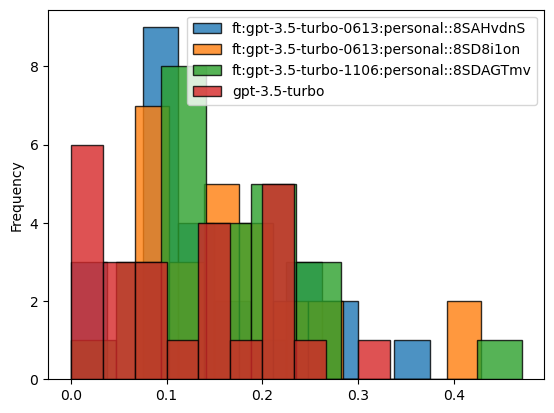

In [167]:
fig, ax = plt.subplots()

gpt_output.groupby('Model')['Jaccard Similarity'].plot(kind='hist', alpha=0.8, legend=True, edgecolor='black', ax=ax)

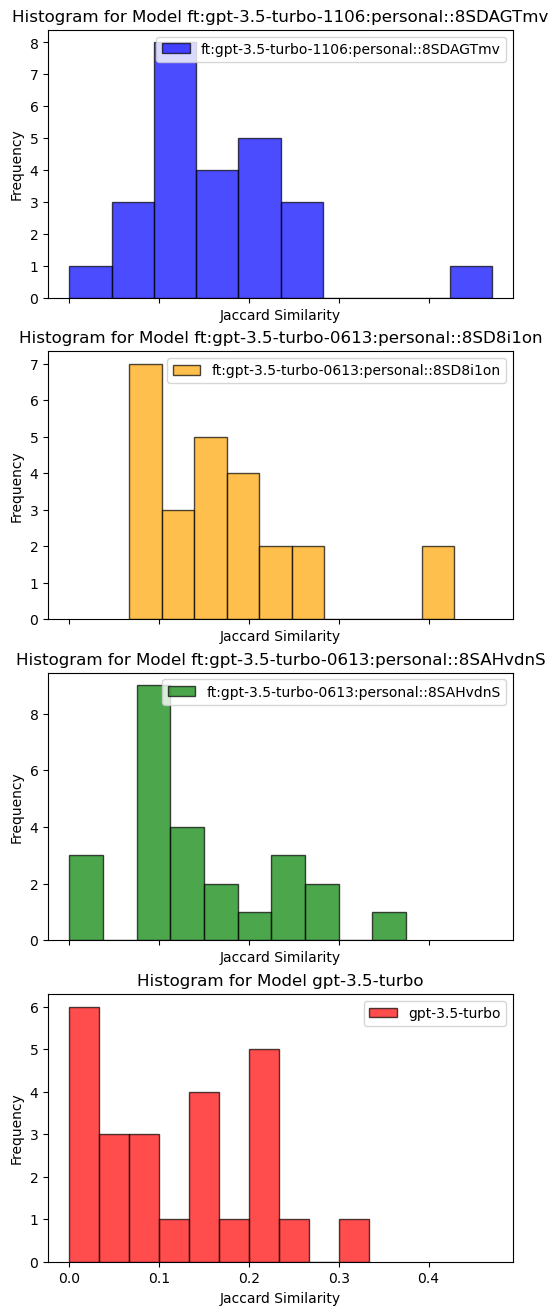

In [168]:
unique_labels = gpt_output['Model'].unique()

fig, axs = plt.subplots(len(unique_labels), 1, figsize=(6, 4 * len(unique_labels)), sharex=True)

colors = ['blue', 'orange', 'green', 'red']
# Plot histograms for each label
for i, label in enumerate(unique_labels):
    subset = gpt_output[gpt_output['Model'] == label]
    axs[i].hist(subset['Jaccard Similarity'], bins=10, alpha=0.7, edgecolor='black', label=label, color=colors[i])
    axs[i].set_title(f'Histogram for Model {label}')
    axs[i].set_xlabel('Jaccard Similarity')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()